In [ ]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import tarfile
import numpy as np
from six.moves import urllib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline 
plt.style.use('ggplot')

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH  = os.path.join("datasets", "housing")
HOUSING_URL   = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
HOUSING_PATH

'datasets/housing'

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
  os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)#Extrai o arquivo zip
 housing_tgz.close()

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
fetch_housing_data()

In [ ]:
housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [ ]:
housing.query('total_rooms < 20')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
3125,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.6250,275000.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,350000.0,<1H OCEAN
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN
7125,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0,<1H OCEAN
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,INLAND
14822,-117.12,32.66,52.0,16.0,4.0,8.0,3.0,1.1250,60000.0,NEAR OCEAN
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


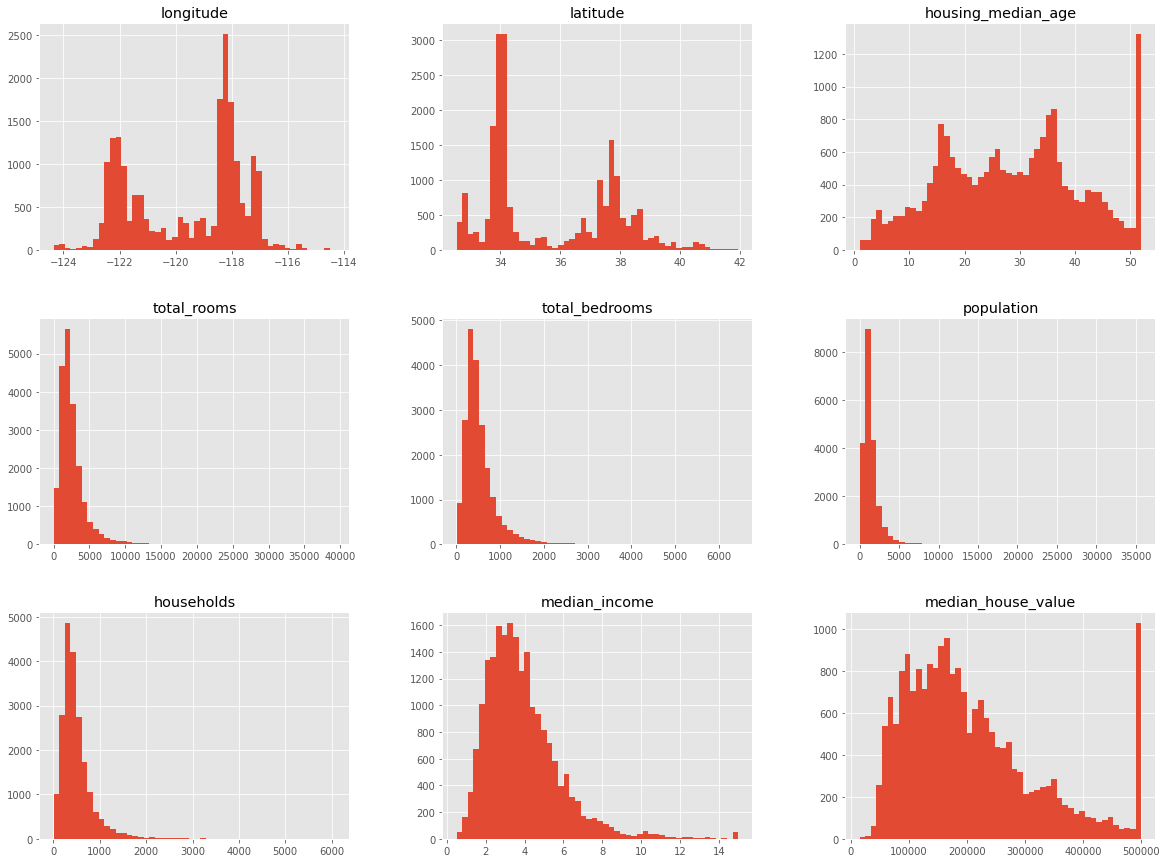

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

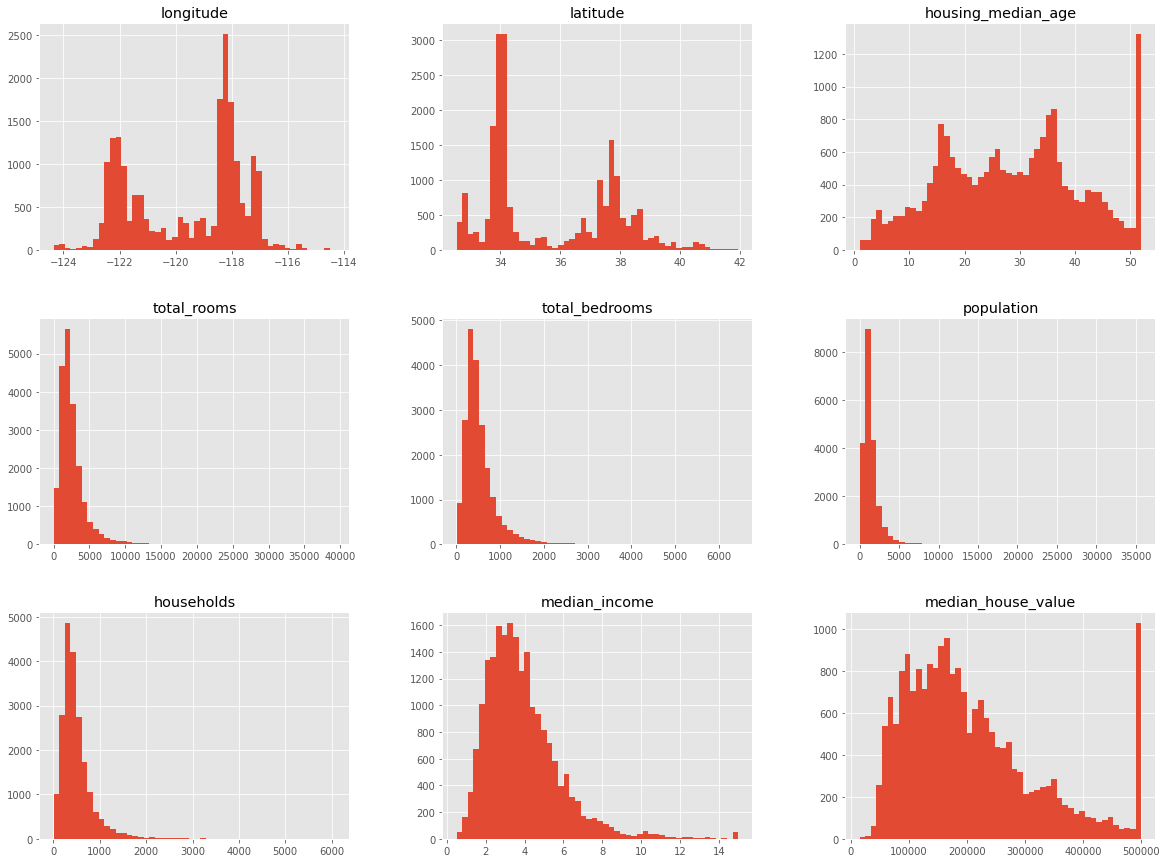

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

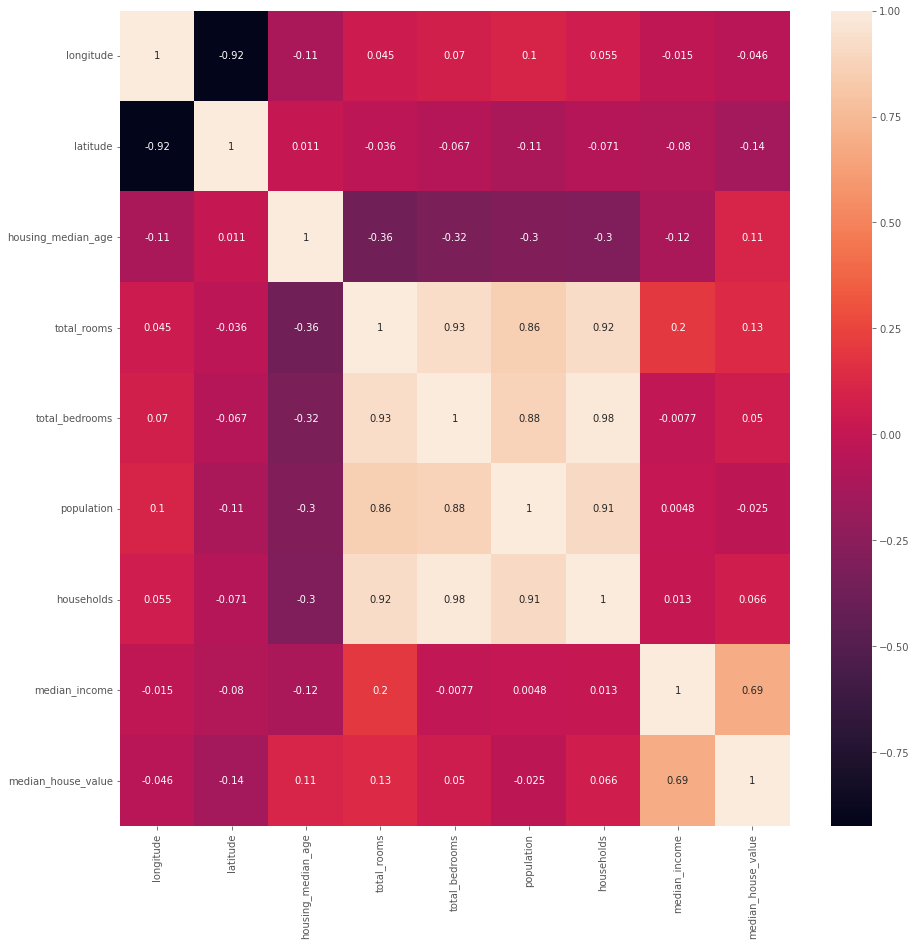

In [ ]:
cor = housing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

[]

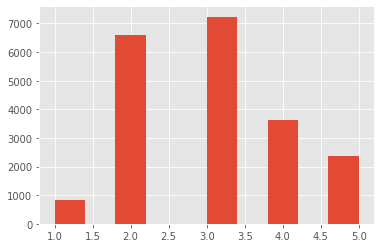

In [ ]:
#CLASSIFICA median_income 

#  Use `cut` quando precisar segmentar e classificar os valores dos dados em compartimentos. este
#      função também é útil para ir de uma variável contínua para uma
#      variável categórica. Por exemplo, `cut` poderia converter idades em grupos de
#      faixas etárias.

housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5,6.,np.inf],labels=[1, 2, 3,4, 5])
housing["income_cat"].hist()
plt.plot()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [ ]:
#SPLIT BASE DE TESTE E TREINO COM SKLEARN
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42,stratify=housing["income_cat"])

In [ ]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
strat_train_set.drop(["income_cat"],axis=1,inplace=True)
strat_test_set.drop(["income_cat"],axis=1,inplace=True)
strat_train_set.head()

In [ ]:
housing = strat_train_set.copy()
housing.head()

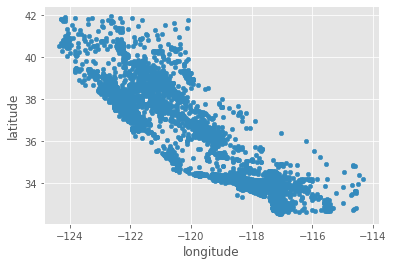

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

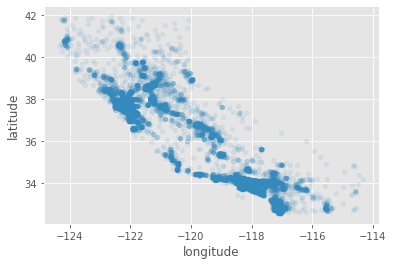

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

**CASAS X VALOR MEDIO**

Podemos perceber que as casas que apresentam o maior valor médio são as situadas no litoral.

[]

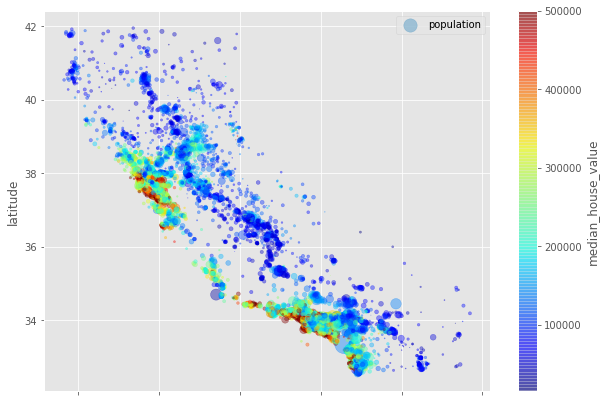

In [ ]:
#MAPA DE CALOR DA POSIÇÃO DAS CASAS X VALOR MEDIO
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.plot()

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

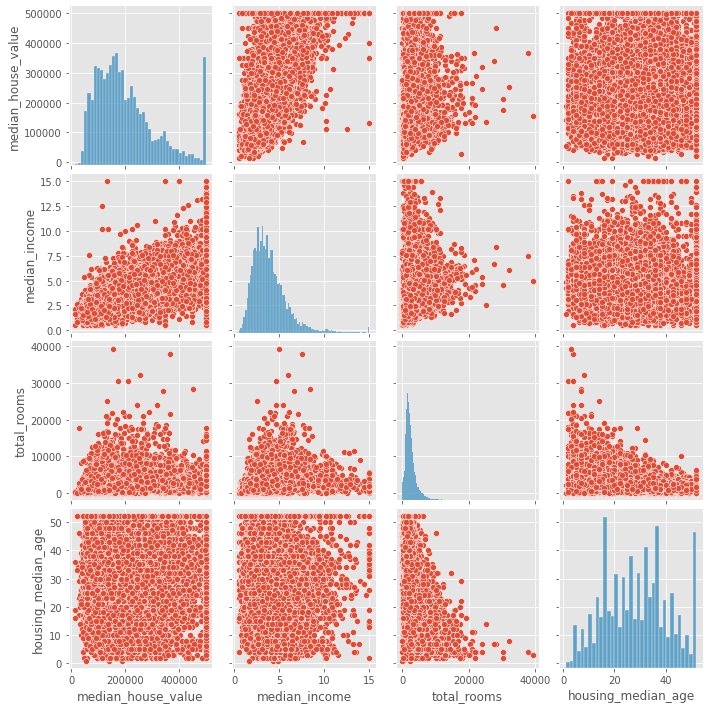

In [ ]:
import seaborn as sns
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]

sns.pairplot(housing[attributes])


**RENDA MÉDIA X VALOR MÉDIO DAS CASAS**

Notasse que aparenta-se ter uma certa correlação diretamente proporcional entre a renda média e o valor médio das casas.

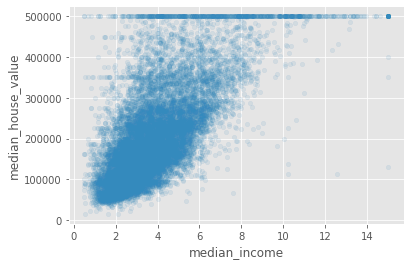

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #Colunms combined

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]#pega a coluna 3 / coluna 6
    population_per_household = X[:, population_ix] / X[:, households_ix]#pega a coluna 5 / coluna 6
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]#pega a coluna 4 / coluna 3
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
corr_matrix = housing.corr()#Correlação de todo o data frame
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [ ]:
#SEPARANDO O PREDICT DAS LABELS
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
#TRATAMENTO DE ATRIBUTOS FALTANTES
from sklearn.impute import SimpleImputer
#Cria um objeto do tipo SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)# Retira a coluna do tipo text 

imputer.fit(housing_num)#Constroi o modelo 
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [ ]:
 housing_cat = housing[["ocean_proximity"]]
 housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
#REALIZA O SCAALONAMENTO DAS COLUNAS NUMERICAS 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()), 
 ('std_scaler', StandardScaler()),
 ])

# housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
#REALIZA O SCALONAMENTO DA COLUNA CATEGORICA 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs)   ,
 ("cat", OneHotEncoder(), cat_attribs),
 ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
#MODEL LINEAR REGRESSOR

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68627.87390018745

In [ ]:
#MODEL TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
#TREE REGRESSOR CROSS VALIDATION

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) #tira a raiz quadratica 

In [ ]:
def display_scores(scores):
 print("Scores:", scores)
 print("Mean:", scores.mean())#media dos scores
 print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [73131.42982417 70513.4454863  69706.03989255 70033.20297027
 70084.69461601 77451.16343265 70871.37963188 73268.10055112
 68179.38807386 70954.97274779]
Mean: 71419.3817226607
Standard deviation: 2473.94307401473


In [ ]:
# LINEAR REGRESSOR CROSS VALIDATION
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


In [ ]:
# MODEL RANDOM REGRESSOR TREE

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

18750.249660349484

In [ ]:
#RANDOM FOREST REGRESSOR CROSS VALIDATION
forest_rmse_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_rmse_scores)
display_scores(forest_rmse_scores)

Scores: [51323.47049341 48947.24513129 46544.68604497 52210.02698665
 47306.48582592 51737.95160736 52530.81950677 49990.48669345
 48542.20329455 54111.09792406]
Mean: 50324.44735084347
Standard deviation: 2331.0416037746522


In [ ]:
#Grid Search FINE-TUNE HYPERPARAMETERS

from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30, 40], 
  'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 
  'n_estimators': [3, 10], 
  'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()#MODEL FOREST REGRESSOR

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,verbose=2
                           )

grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.1s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.1s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.1s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.1s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.3s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.2s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.3s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.7s
[CV] END ....................max_features=2, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [ ]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 40}

In [ ]:
# best estimator
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=40)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63496.15644641864 {'max_features': 2, 'n_estimators': 3}
55704.5450080366 {'max_features': 2, 'n_estimators': 10}
52483.45934333794 {'max_features': 2, 'n_estimators': 30}
52562.843674710966 {'max_features': 2, 'n_estimators': 40}
60954.19897128951 {'max_features': 4, 'n_estimators': 3}
52436.72029433374 {'max_features': 4, 'n_estimators': 10}
50567.982919202244 {'max_features': 4, 'n_estimators': 30}
50059.397306834304 {'max_features': 4, 'n_estimators': 40}
58864.94795274835 {'max_features': 6, 'n_estimators': 3}
52234.30934265941 {'max_features': 6, 'n_estimators': 10}
49981.93152333663 {'max_features': 6, 'n_estimators': 30}
49665.602770899655 {'max_features': 6, 'n_estimators': 40}
57870.83874816865 {'max_features': 8, 'n_estimators': 3}
52336.14343946512 {'max_features': 8, 'n_estimators': 10}
50186.583037696786 {'max_features': 8, 'n_estimators': 30}
49779.2841583942 {'max_features': 8, 'n_estimators': 40}
61977.27486512548 {'bootstrap': False, 'max_features': 2, 'n_estimators':

In [ ]:
#Pontuação de importania dos atibutos

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([7.70940803e-02, 7.73682642e-02, 4.22889566e-02, 1.73716785e-02,
       1.73746823e-02, 1.77888801e-02, 1.59858595e-02, 3.57213997e-01,
       5.17671001e-02, 1.03445187e-01, 7.43579783e-02, 6.63090561e-03,
       1.34621443e-01, 6.69215195e-05, 2.25604717e-03, 4.36801959e-03])

In [ ]:
# Pontuação dos atributos

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3572139966007557, 'median_income'),
 (0.13462144266291232, 'INLAND'),
 (0.10344518703092083, 'pop_per_hhold'),
 (0.0773682641997071, 'latitude'),
 (0.07709408028756767, 'longitude'),
 (0.0743579782630466, 'bedrooms_per_room'),
 (0.05176710013063287, 'rooms_per_hhold'),
 (0.042288956556816484, 'housing_median_age'),
 (0.01778888014184394, 'population'),
 (0.01737468225111352, 'total_bedrooms'),
 (0.017371678483282756, 'total_rooms'),
 (0.015985859498440037, 'households'),
 (0.006630905613072116, '<1H OCEAN'),
 (0.0043680195875848175, 'NEAR OCEAN'),
 (0.0022560471728372412, 'NEAR BAY'),
 (6.692151946591574e-05, 'ISLAND')]

In [ ]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
#Evaluate the Test Set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)

y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
def interval_conf(data):
  dist = np.array(data)
  inf  = np.mean(dist) + 0.95*(np.std(dist)/np.sqrt(dist.size))
  sup  = np.mean(dist) - 0.95*(np.std(dist)/np.sqrt(dist.size))
  return inf,sup


In [ ]:
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(interval_conf(squared_errors))

array([48271.20129046, 46447.24623754])

In [ ]:
# Confidence Interval = x  +/-  t*(s/√n)
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
interval_conf = np.sqrt(stats.t.interval(confidence, 
                                         len(squared_errors) - 1,
                                         loc=squared_errors.mean(),
                                         scale=stats.sem(squared_errors)
                                         )
                        )

print(f'Intervalo de confiança de do modelo esta entre {interval_conf[0]} e {interval_conf[1]}')

Intervalo de confiança de do modelo esta entre 45447.104815827974 e 49213.98399777686
